In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
x=np.linspace(0,10,30)

In [3]:
y=x**3-9*x**2+2*x-20

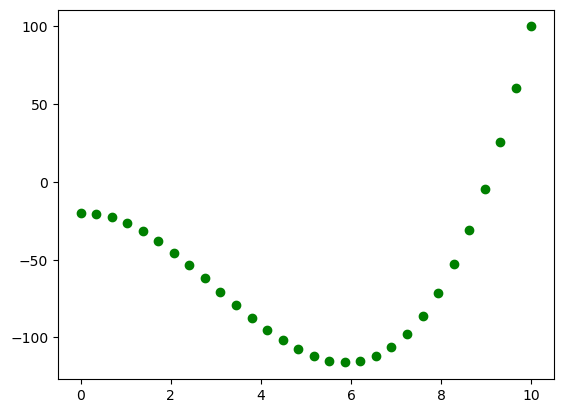

In [4]:
plt.plot(x,y,'go')

In [5]:
X=np.array([x**i for i in range(4)]).T
X.shape

(30, 4)

In [6]:
# a=(x.T@x)^-1@x.T@y

a=np.linalg.pinv(X.T@X)@X.T@y

In [7]:
f =lambda x,a,b,c,d: a+b*x+c*x**2+d*x**3

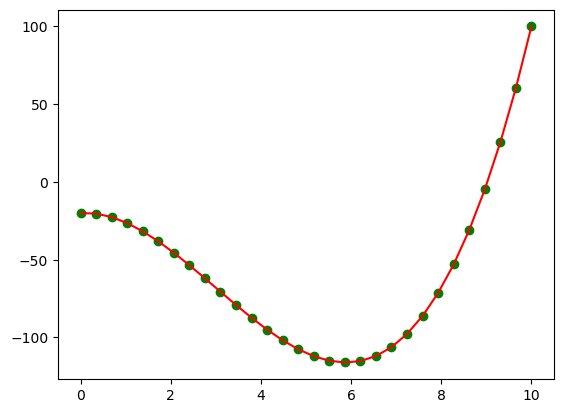

In [8]:
plt.plot(x,y,'go')
plt.plot(x,f(x,*a),'r-')

In [9]:
a=np.array([1,1,1,1])

In [10]:
t=np.array([0,2,4,6,8,10])
y=t**3-9*t**2+2*t-20
y

array([ -20,  -44,  -92, -116,  -68,  100])

In [11]:
T=np.array([t**i for i in range(4)]).T
yp=T@a
yp

array([   1,   15,   85,  259,  585, 1111])

In [12]:
e=y-yp
e

array([  -21,   -59,  -177,  -375,  -653, -1011])

In [13]:
grad=-2*T.T@e
grad

array([   4592,   36820,  318920, 2876272])

In [14]:
T

array([[   1,    0,    0,    0],
       [   1,    2,    4,    8],
       [   1,    4,   16,   64],
       [   1,    6,   36,  216],
       [   1,    8,   64,  512],
       [   1,   10,  100, 1000]])

In [15]:
a

array([1, 1, 1, 1])

In [16]:
grad

array([   4592,   36820,  318920, 2876272])

In [17]:
a=a-0.0000001*grad
a

array([0.9995408, 0.996318 , 0.968108 , 0.7123728])

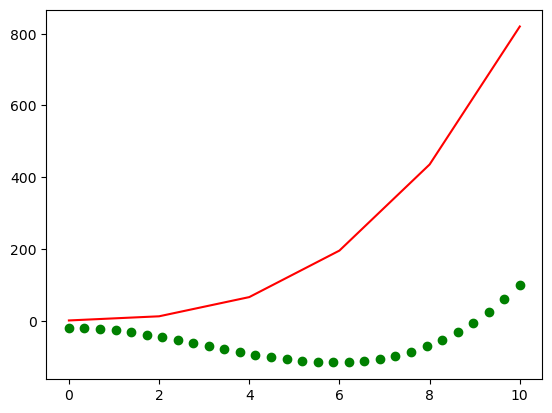

In [18]:
x1=np.linspace(0,10,30)
y1=x1**3-9*x1**2+2*x1-20
plt.plot(x1,y1,'go')
plt.plot(t,f(t,*a),'r-')

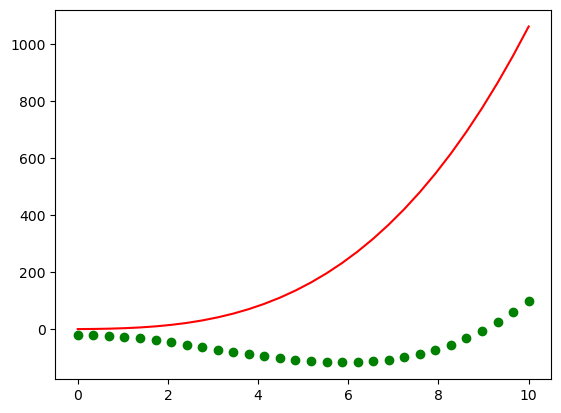

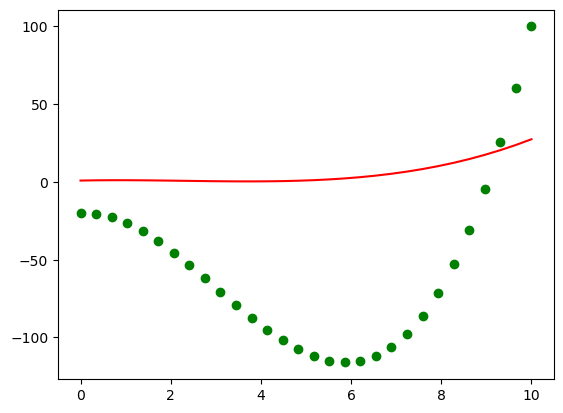

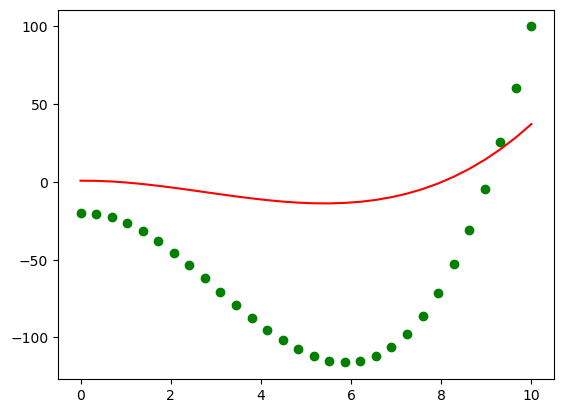

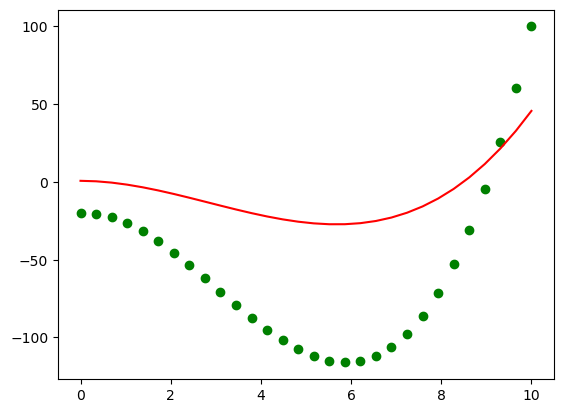

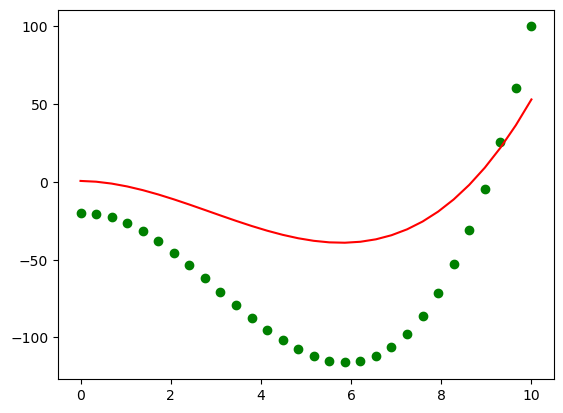

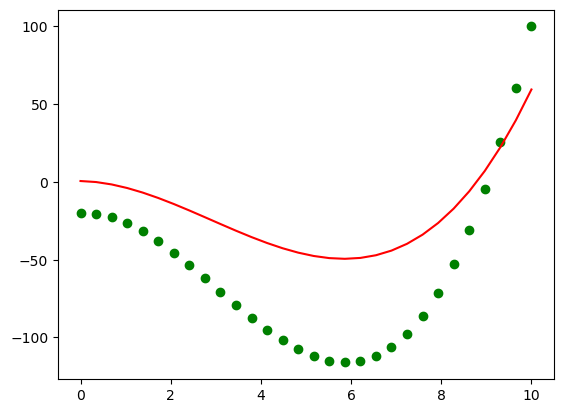

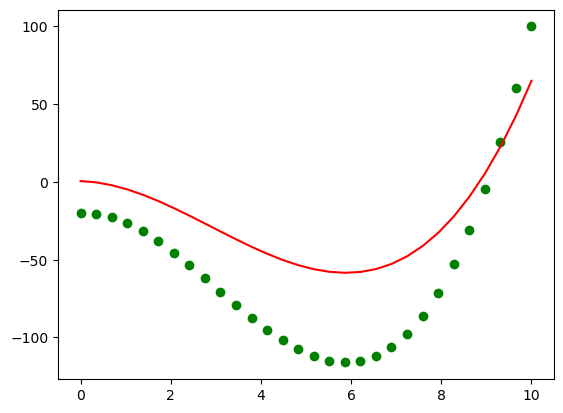

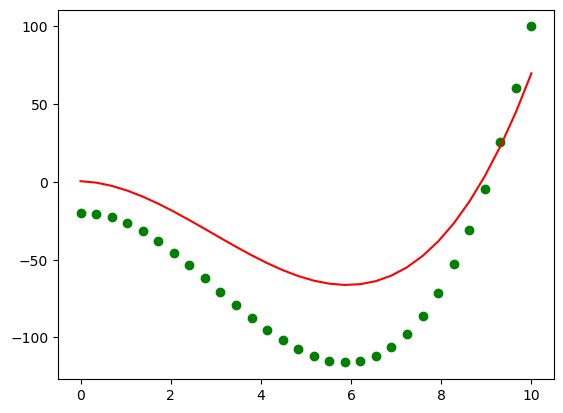

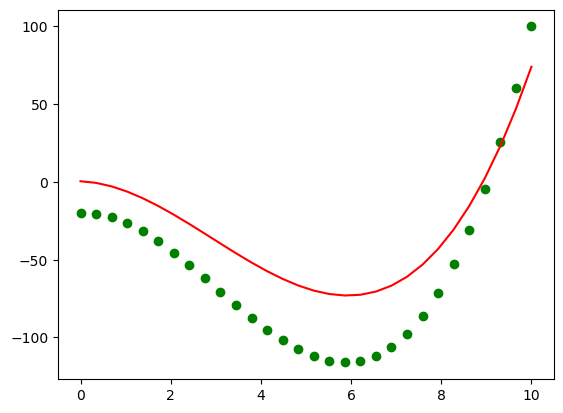

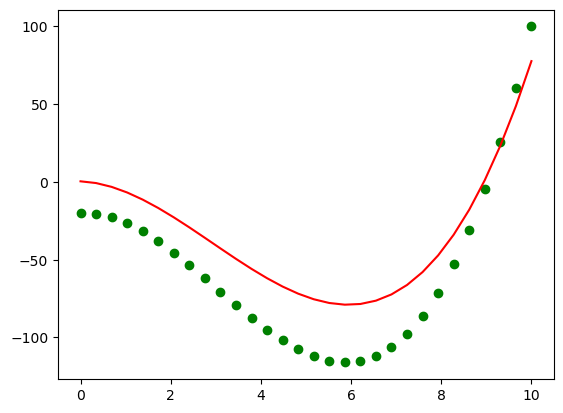

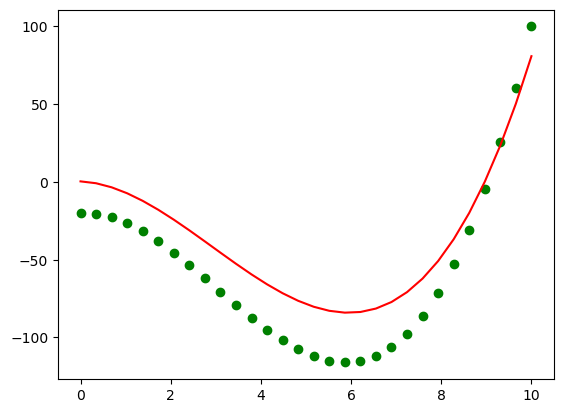

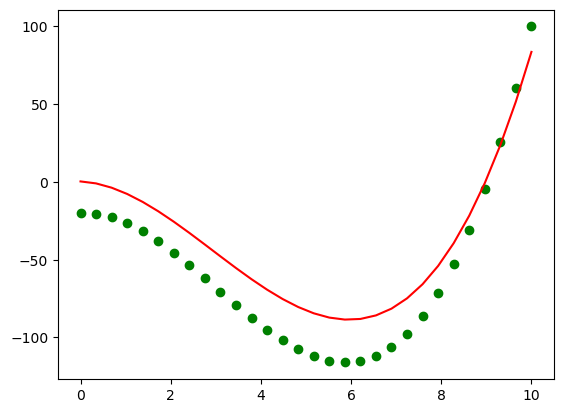

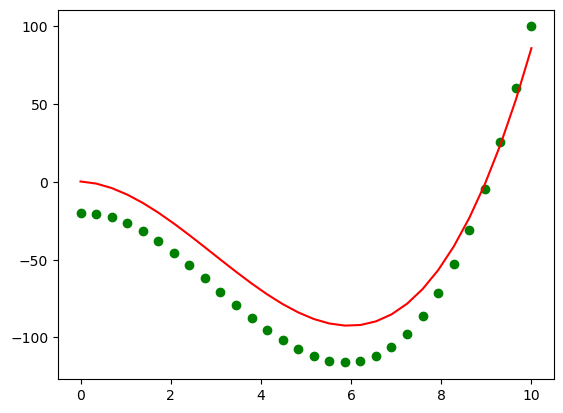

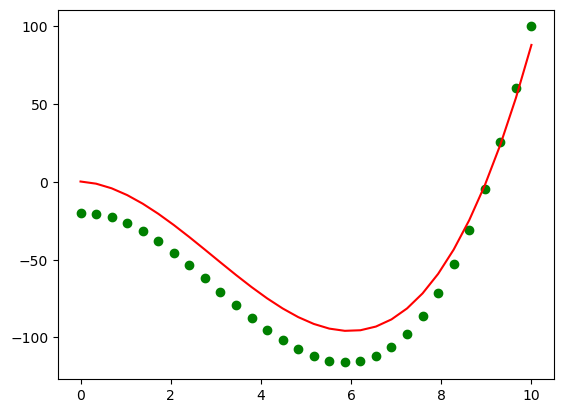

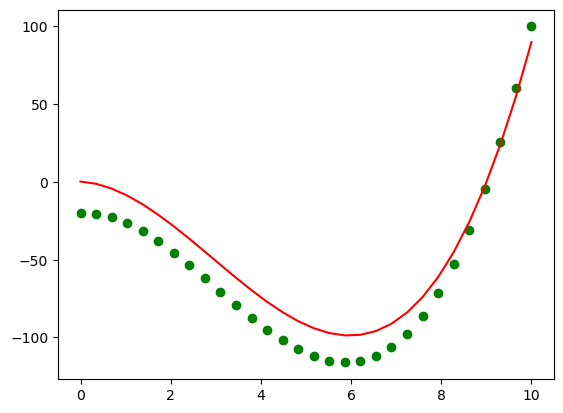

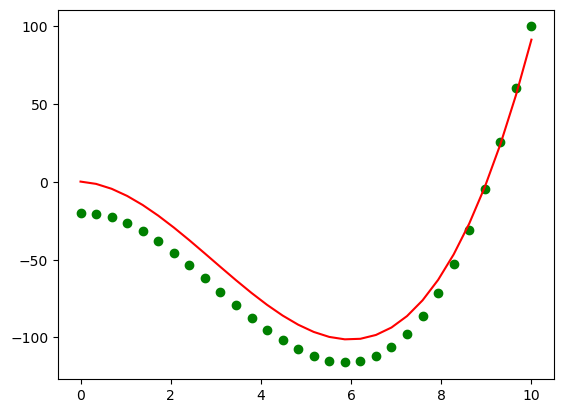

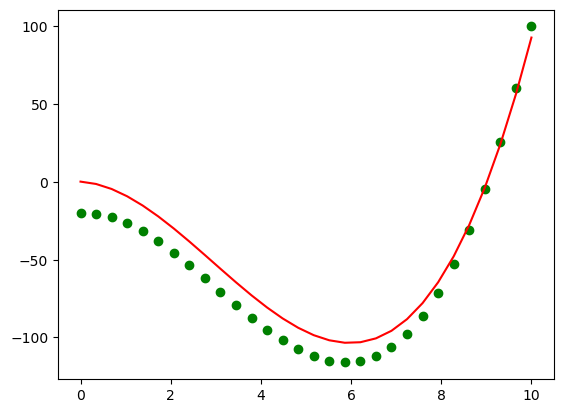

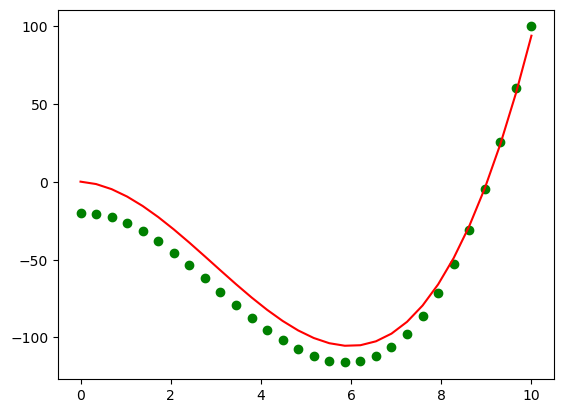

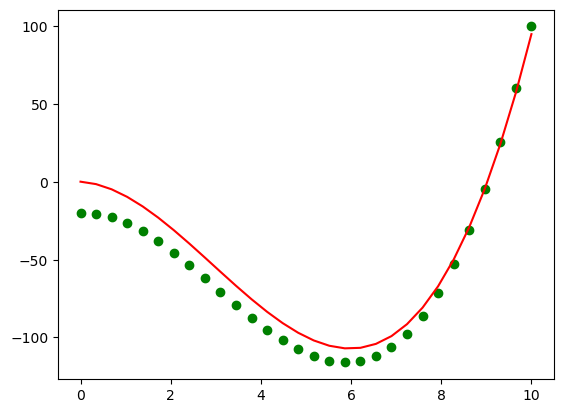

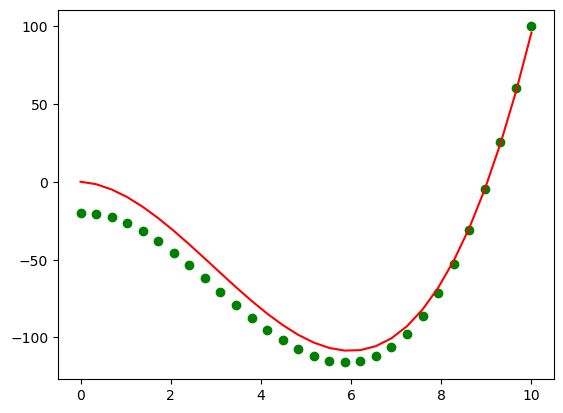

In [19]:
a=np.array([1,1,1,1])
t=np.array([0,2,4,6,8,10])
y=t**3-9*t**2+2*t-20

for i in range(200000):
    T=np.array([t**i for i in range(4)]).T
    yp=T@a
    e=y-yp
    grad=-2*T.T@e/len(y)
    a=a-0.0000001*grad
    x1=np.linspace(0,10,30)
    y1=x1**3-9*x1**2+2*x1-20
    if i%10000==0:
        plt.plot(x1,y1,'go')
        plt.plot(x1,f(x1,*a),'r-')
        plt.show()

       

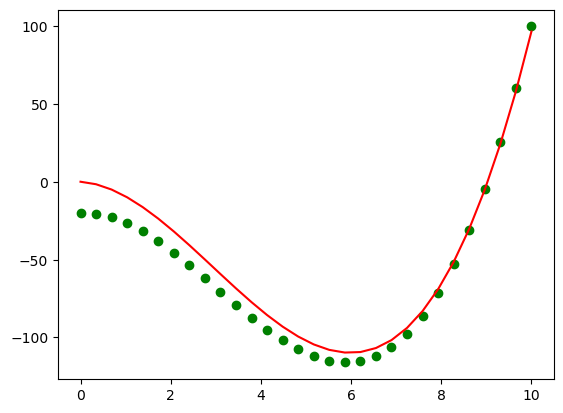

In [20]:
plt.plot(x1,y1,'go')
plt.plot(x1,f(x1,*a),'r-')

In [21]:
a

array([ 0.1433476 , -1.83399642, -8.59884066,  0.97483951])

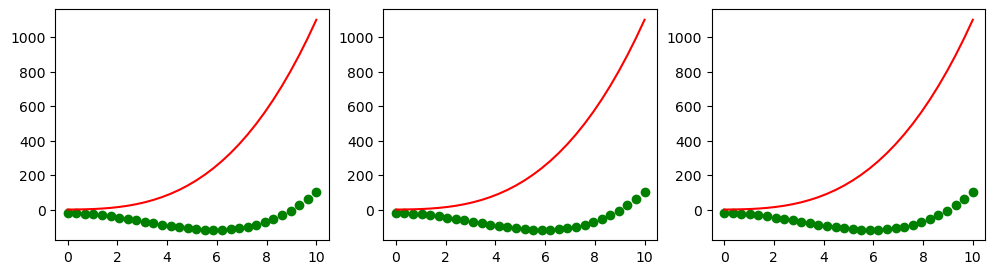

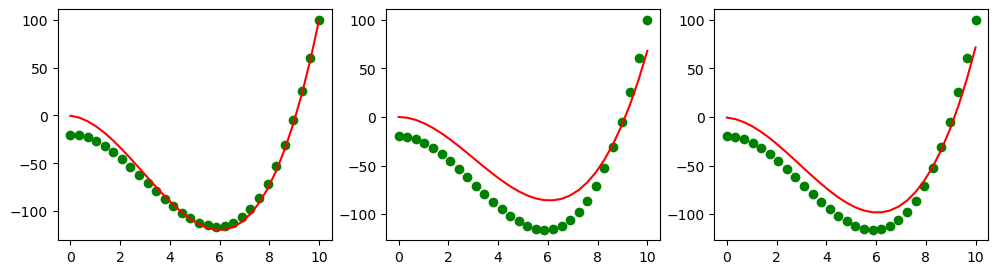

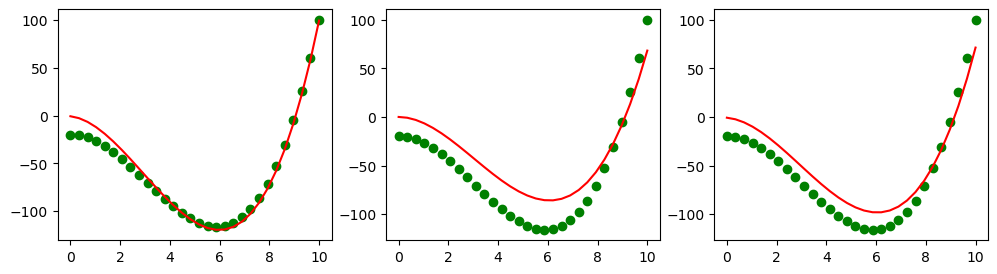

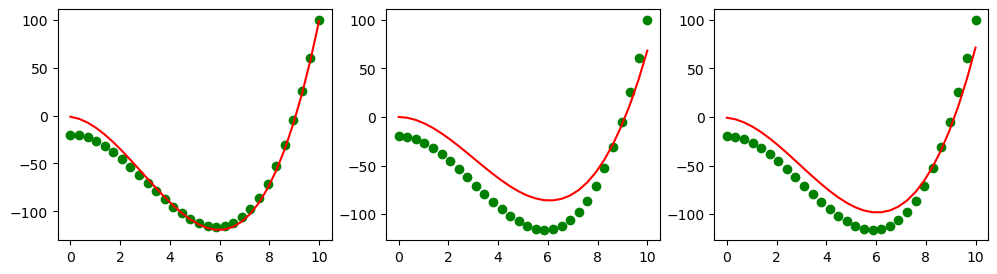

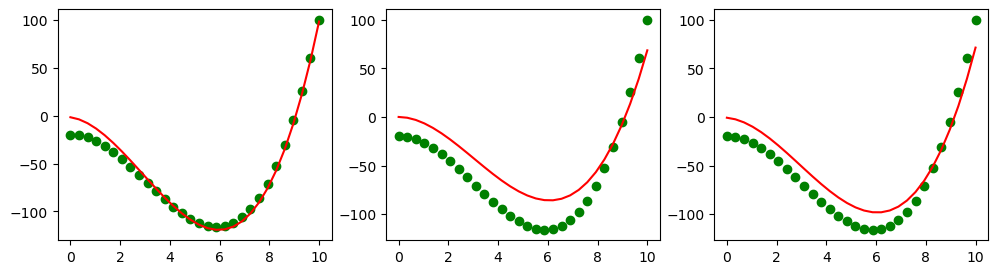

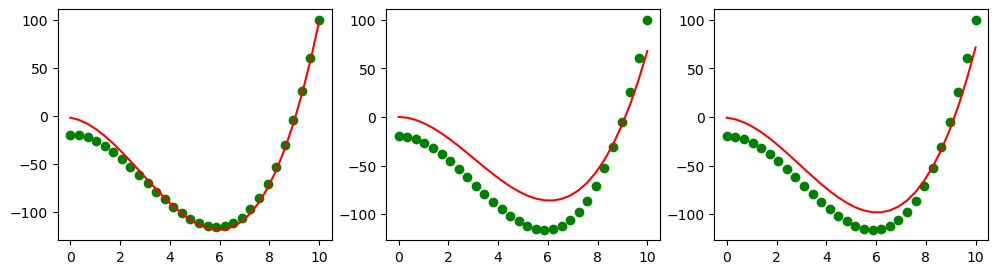

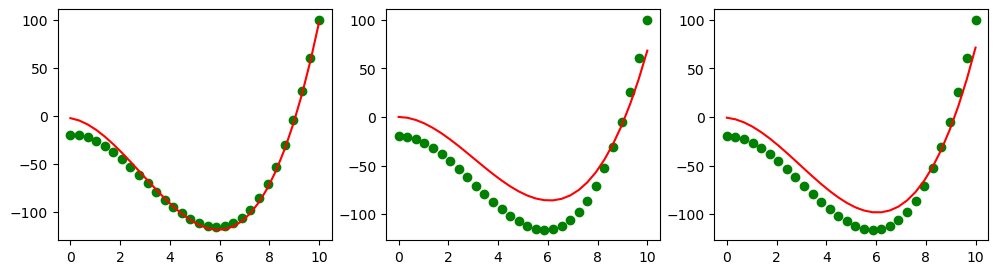

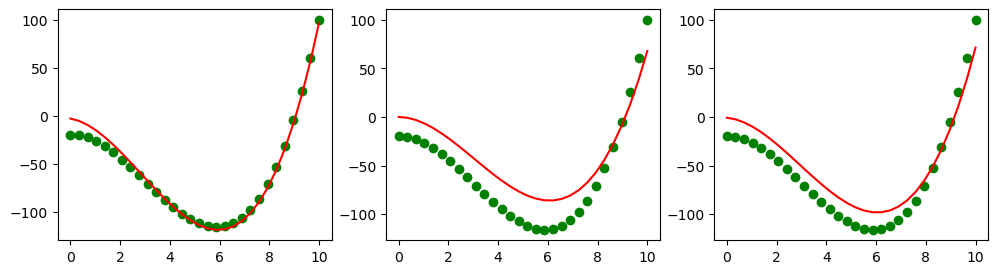

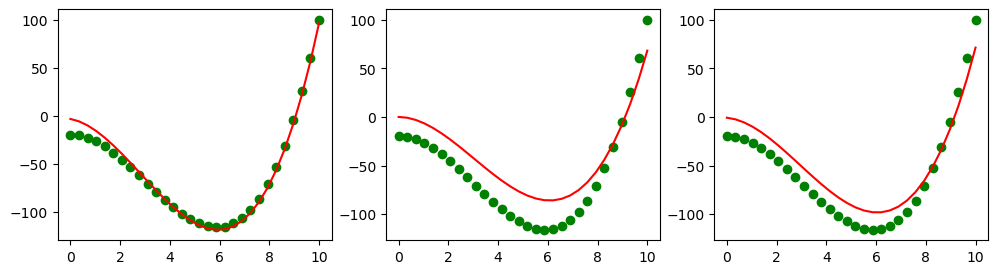

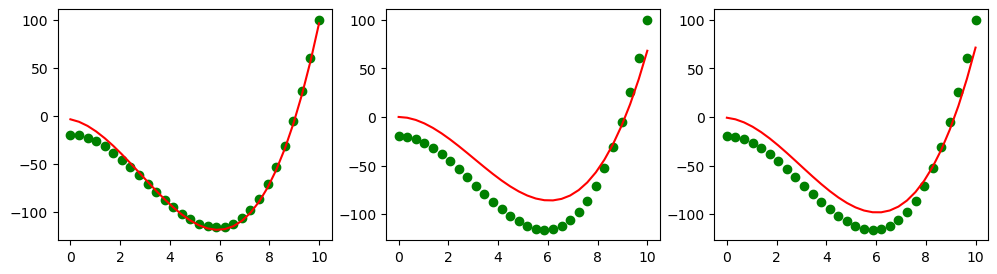

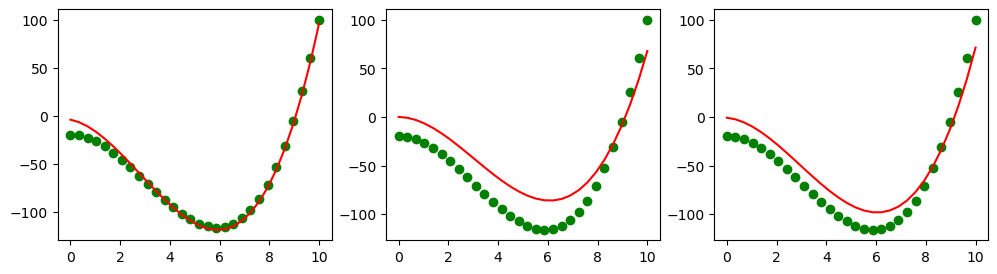

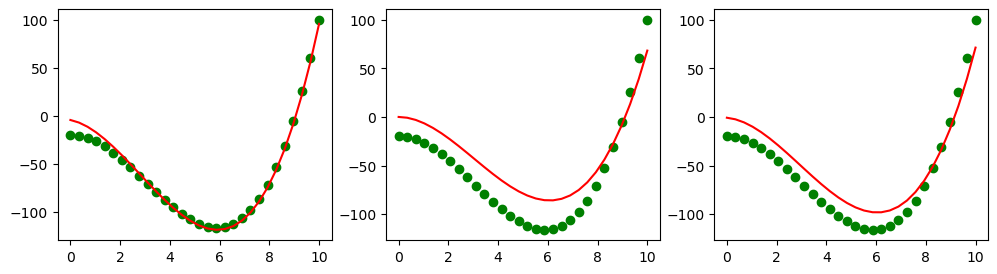

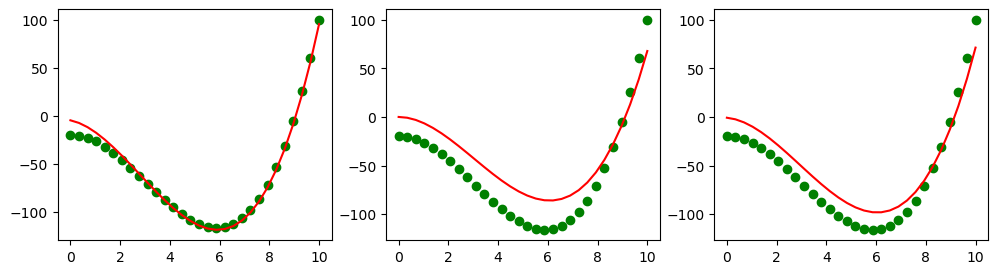

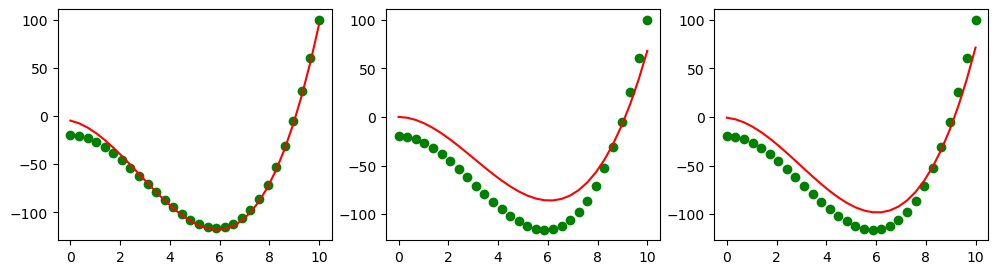

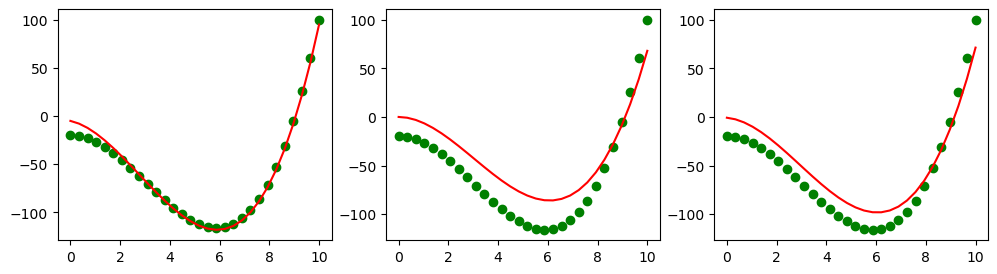

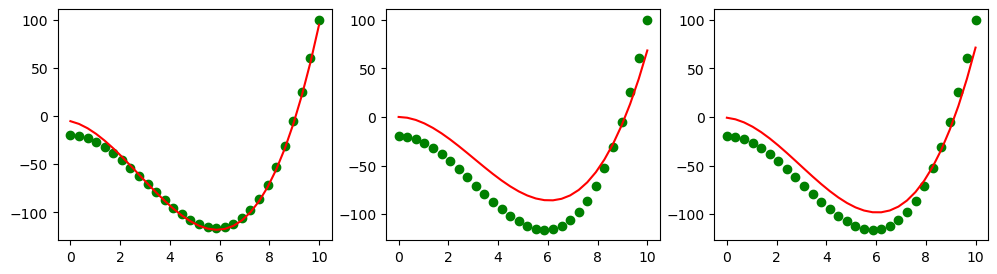

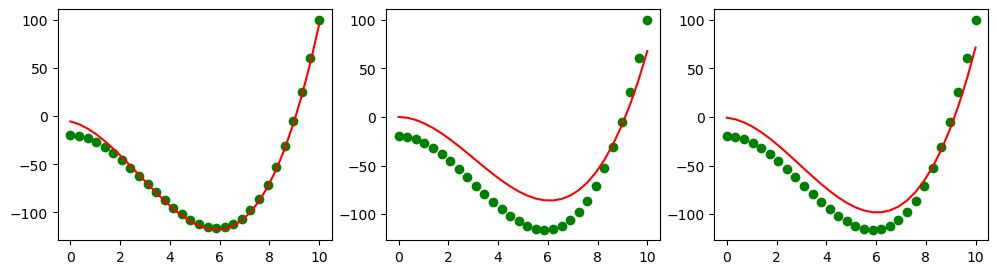

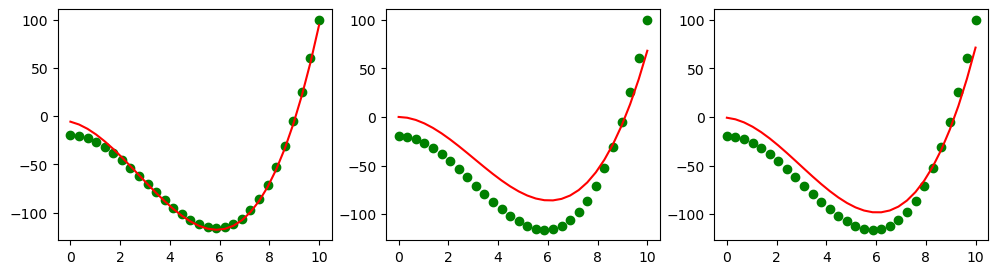

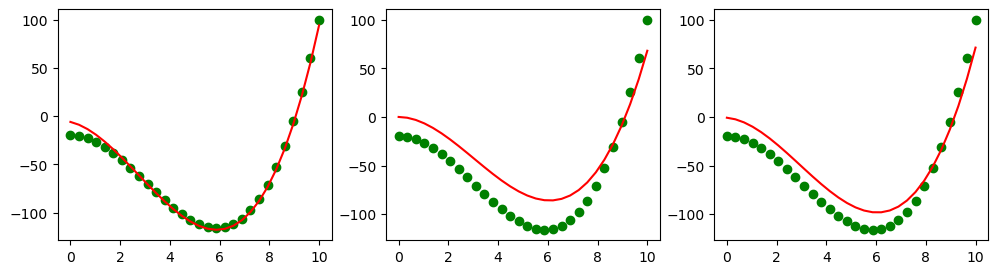

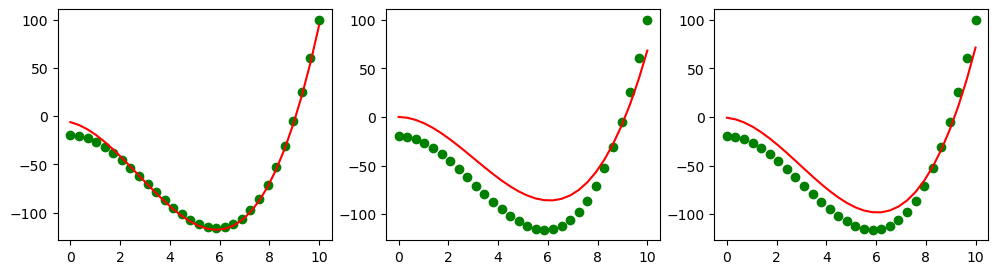

In [24]:
a=np.array([1,1,1,1])
#t=np.array([0,2,4,6,8,10])
t=np.linspace(0,10,30)
y=t**3-9*t**2+2*t-20
T=np.array([t**i for i in range(4)]).T
x1=np.linspace(0,10,30)
y1=x1**3-9*x1**2+2*x1-20
beta=np.zeros((3,len(a)))
beta[0:3]=a

for i in range(200000):
    for m in range(3):
        a=beta[m].copy()
        yp=T@a
        e=y-yp
        if m==0:
            grad=-2*T.T@e/len(y)
        elif m==1 : # Lasso
            grad=-2*T.T@e/len(y)+300*np.sign(a+1e-7) #Lasso
        else:
            grad=-2*T.T@e/len(y)+30*a  #Ridge
        grad_n= np.linalg.norm(grad)
        grad = grad/ grad_n
        a=a-0.01*grad
        beta[m]=a.copy()

    if i%10000==0:
        plt.figure(figsize=(12,3))
        for m in range(3):
            plt.subplot(131+m)
            plt.plot(x1,y1,'go')
            plt.plot(x1,f(x1,*beta[m]),'r-')
        plt.show()


In [ ]:
beta

In [ ]:
a

In [ ]:
a=np.array([1,1,1,1])
t=np.array([0,2,4,6,8,10])
y=t**3-9*t**2+2*t-20
epsilon=1e-7

for i in range(200000):
    T=np.array([t**i for i in range(4)]).T
    yp=T@a
    e=y-yp
    grad=-2*T.T@e/len(y)+300*np.sign(a+epsilon) # Lasso
    a=a-0.000001*grad
    x1=np.linspace(0,10,30)
    y1=x1**3-9*x1**2+2*x1-20
    if i%10000==0:
        plt.plot(x1,y1,'go')
        plt.plot(x1,f(x1,*a),'r-')
        plt.show()
